In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras as keras
from tensorflow.keras import regularizers
from tensorflow.keras.initializers import GlorotNormal
from tensorflow.keras.metrics import TruePositives, FalsePositives, TrueNegatives, FalseNegatives, BinaryAccuracy, Precision, Recall, AUC
import numpy as np
# from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import os
import time
import cv2
import pathlib
import matplotlib as mpl

In [ ]:
pip install unrar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!unrar x /content/BatImageDataset.rar


UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from /content/BatImageDataset.rar

Creating    BatImageDataset                                           OK
Creating    BatImageDataset/bat                                       OK
Extracting  BatImageDataset/bat/bat00.jpg                                  0%  OK 
Extracting  BatImageDataset/bat/bat1.jpg                                   0%  OK 
Extracting  BatImageDataset/bat/bat10.jpg                                  1%  OK 
Extracting  BatImageDataset/bat/bat11.jpg                                  1%  OK 
Extracting  BatImageDataset/bat/bat111.jpg                                 2%  OK 
Extracting  BatImageDataset/bat/bat112.jpg                                 2%  OK 
Extracting  BatImageDataset/bat/bat113.jpg                                 2%  OK 
Extracting  BatImageDataset/bat/bat114.jpg                                 3%  

In [ ]:
data_dir = "/content/BatImageDataset"

In [ ]:
classes_name = ['bat', 'notBat']

In [ ]:
data_dir = pathlib.Path(data_dir)

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

227


In [ ]:
def directory_dataset(data_dir):
  folders = []
  for i in data_dir.iterdir():
    if i.is_dir():
      folders.append(i)
  return folders
folders = directory_dataset(data_dir)
print(folders)

[PosixPath('/content/BatImageDataset/notBat'), PosixPath('/content/BatImageDataset/bat')]


In [ ]:

def number_of_images_in_dataset(data_dir):
  images = list(data_dir.glob("*/*.*"))
  return len(images)
print("number of all images in dataset: {}".format(number_of_images_in_dataset(data_dir)))

def number_of_images_in_each_folder(folders):
  for i in folders:
    str_ = "{}: {}".format(i, len(list(pathlib.Path(i).glob("*.*"))))
    print(str_)
number_of_images_in_each_folder(folders)

number of all images in dataset: 227
/content/BatImageDataset/notBat: 93
/content/BatImageDataset/bat: 134


/content/BatImageDataset/notBat/image (31).jpg


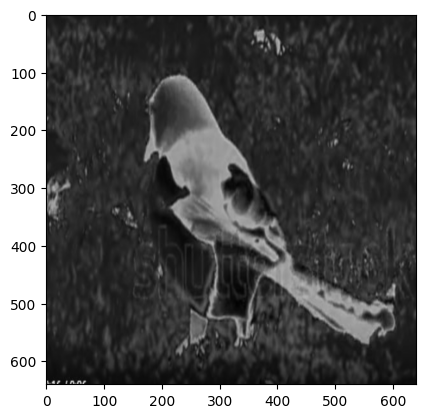

/content/BatImageDataset/bat/bat3.jpg


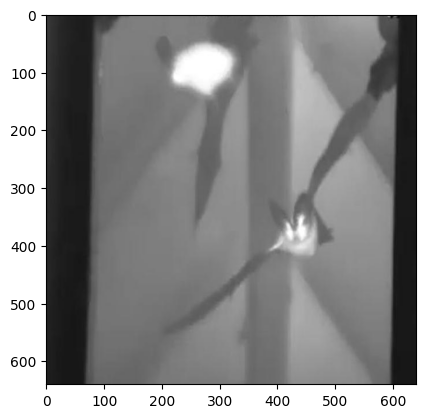

In [ ]:
def show_single_image_in_each_directory(folders):
  for i in folders:
    images = list(pathlib.Path(i).glob("*.*"))
    print(images[0])
    img = cv2.imread(os.path.join(images[0]))
    img = cv2.resize(img, (640, 640))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
show_single_image_in_each_directory(folders)

In [ ]:
img_width = 640
img_height = 640
batch_size = 16
color = 3

In [ ]:
def Blurring(image):
  image = cv2.medianBlur(image,5)
  return image
def image_generator(dataset_folder):
  datagen = ImageDataGenerator( rescale=1/255, validation_split=0.3,vertical_flip=True ,horizontal_flip=True,width_shift_range=0.2,height_shift_range=0.2,
                               rotation_range = 5, shear_range = 0.02,zoom_range = 0.02, preprocessing_function = Blurring)
  train_generator = datagen.flow_from_directory(
      dataset_folder,
      target_size=(img_height, img_width),
      batch_size=batch_size,
      class_mode='categorical',
      shuffle=True,
      subset='training')
  validation_generator = datagen.flow_from_directory(
      dataset_folder,
      target_size=(img_height, img_width),
      batch_size= batch_size,
      shuffle=False,
      class_mode='categorical',
      subset='validation')
  return [train_generator, validation_generator]

In [ ]:
[training_dataset, validation_dataset] = image_generator(data_dir)

Found 160 images belonging to 2 classes.
Found 67 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


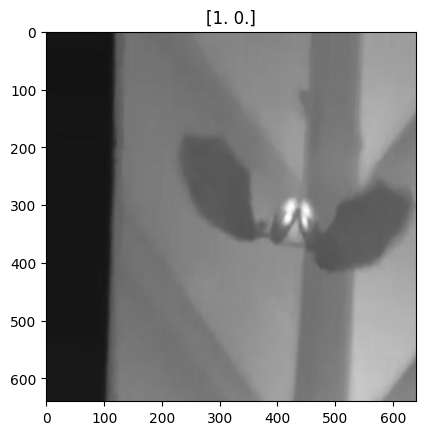

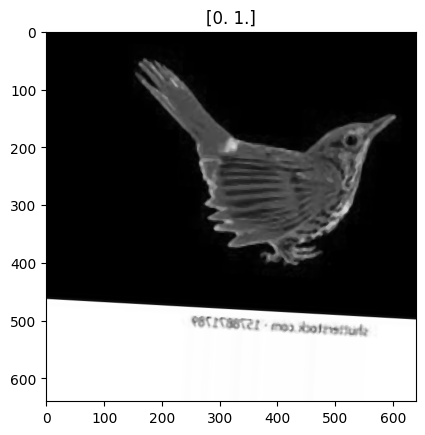

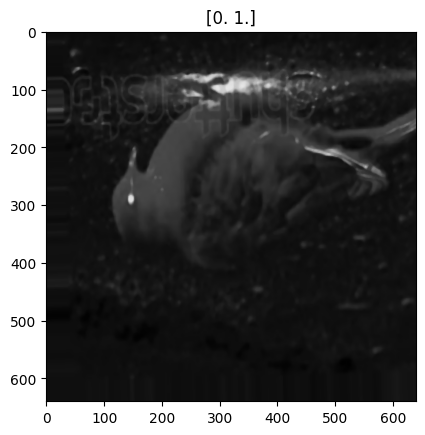

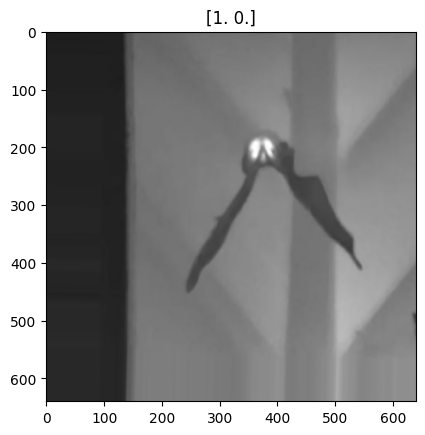

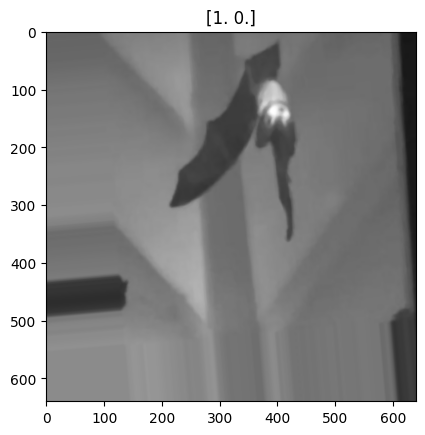

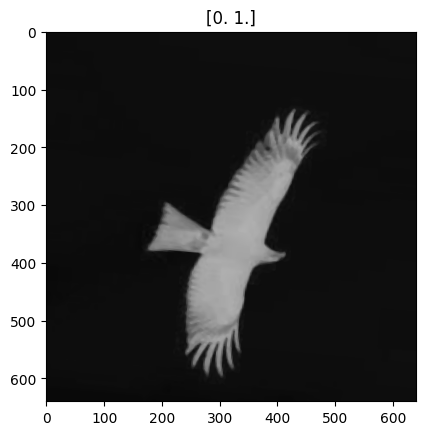

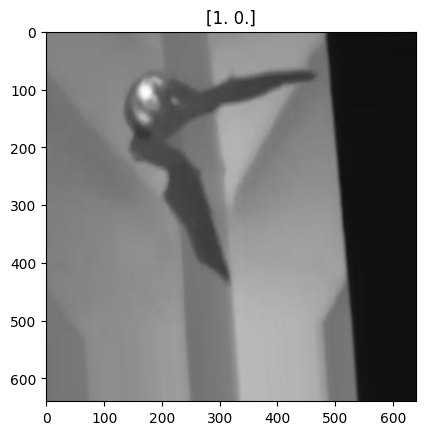

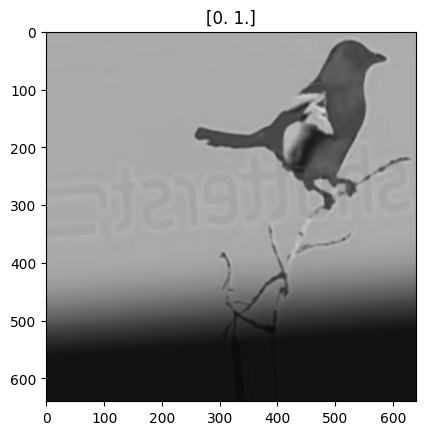

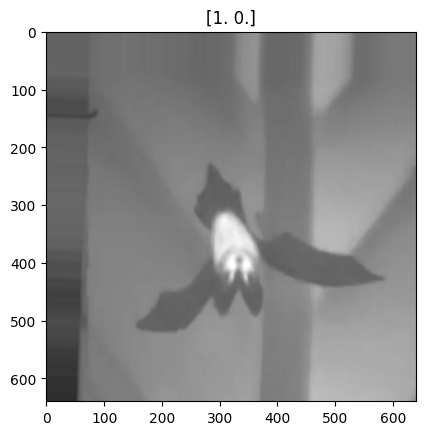

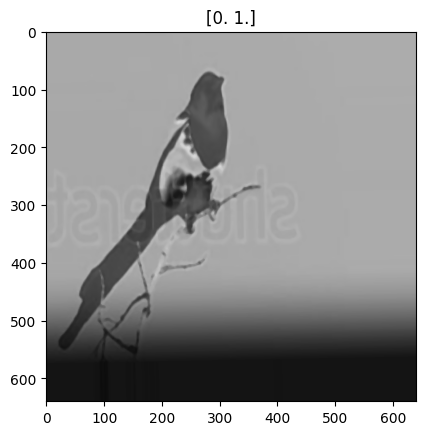

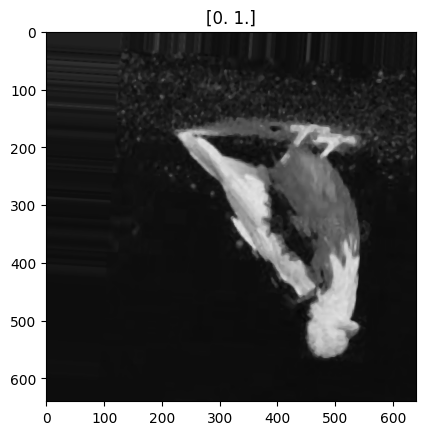

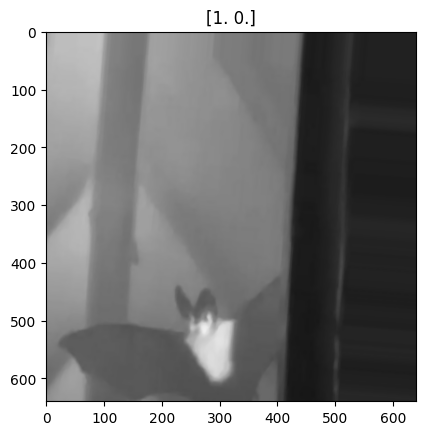

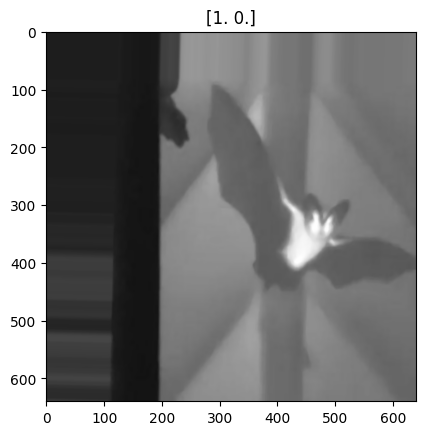

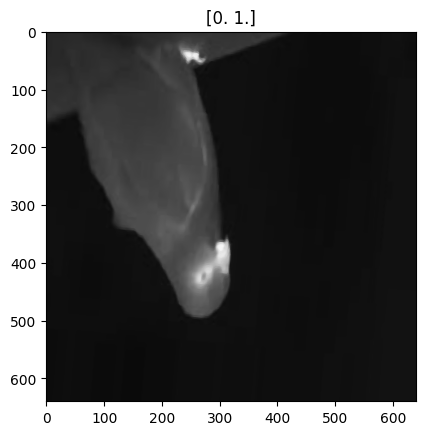

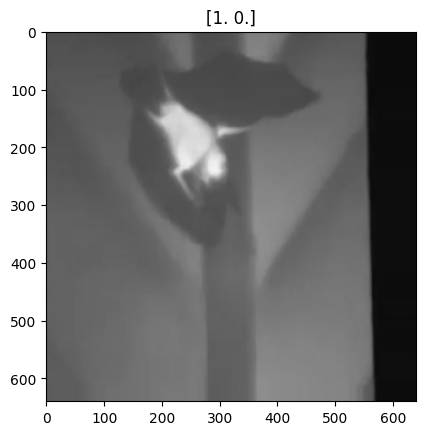

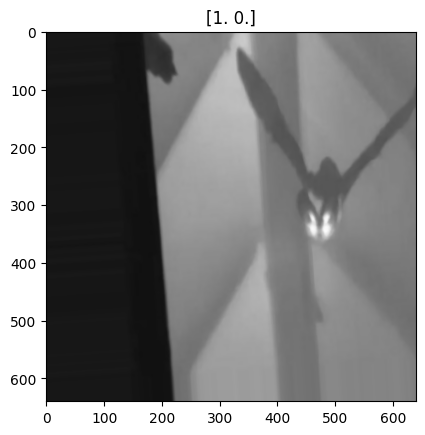

In [ ]:
def show_one_batch(data_generator):
    single_batch = data_generator.next()
    images = single_batch[0]
    labels = single_batch[1]
    for i in range(batch_size):
        plt.imshow(images[i])
        plt.title(labels[i])
        plt.show()
show_one_batch(training_dataset)

In [ ]:
mo = keras.applications.mobilenet_v2
conv_model = mo.MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, color))
the_model = keras.layers.Dropout(0.2)(conv_model.output)
the_model = keras.layers.Flatten()(the_model)
the_model = keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01))(the_model)
the_model = keras.layers.Dropout(0.2)(the_model)
the_model = keras.layers.Dense(128, activation='relu',  kernel_regularizer=tf.keras.regularizers.L2(0.01))(the_model)
the_model = keras.layers.Dropout(0.2)(the_model)
the_model = keras.layers.Dense(64, activation='relu',  kernel_regularizer=tf.keras.regularizers.L2(0.01))(the_model)
the_model = keras.layers.Dropout(0.2)(the_model)
the_model = keras.layers.Dense(32, activation='relu',  kernel_regularizer=tf.keras.regularizers.L2(0.01))(the_model)
the_model = keras.layers.Dropout(0.2)(the_model)
the_model = keras.layers.Dense(16, activation='relu',  kernel_regularizer=tf.keras.regularizers.L2(0.01))(the_model)
the_model = keras.layers.Dropout(0.2)(the_model)
predictions = keras.layers.Dense(len(classes_name), activation='softmax', activity_regularizer=tf.keras.regularizers.L2(0.01))(the_model)
mo = keras.models.Model(inputs=conv_model.input, outputs=predictions)
for layer in mo.layers[:151]:
    layer.trainable = False
for layer in mo.layers[151:]:
    layer.trainable = True
mo.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 640, 640, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 320, 320, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 320, 320, 32  128         ['Conv1[0][0]']                  
                               

In [ ]:
len(mo.layers)
mo.layers[151:]

In [ ]:

me = [
      TruePositives(name='tp'),
      FalsePositives(name='fp'),
      TrueNegatives(name='tn'),
      FalseNegatives(name='fn'),
      BinaryAccuracy(name='accuracy'),
      Precision(name='precision'),
      Recall(name='recall'),
      AUC(name='auc')
]

In [ ]:
base_learning_rate = 0.01
mo.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=base_learning_rate),
              loss="categorical_crossentropy",
              metrics=me)

In [ ]:
call_1 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=30, restore_best_weights=True)
callbacks = [call_1]

In [ ]:
import time

start_time = time.time()

# Define the model architecture, compile the model, set up callbacks, etc.

epochs = 5
history = mo.fit(
  training_dataset,
  epochs=epochs,
  callbacks=callbacks,
  batch_size=batch_size
)

end_time = time.time()
total_time = end_time - start_time
print("Total training time: {:.2f} seconds".format(total_time))


Epoch 1/5
10/10 [==============================] - 96s 9s/step - loss: 248.7026 - tp: 89.0000 - fp: 71.0000 - tn: 89.0000 - fn: 71.0000 - accuracy: 0.5562 - precision: 0.5562 - recall: 0.5562 - auc: 0.5557
Epoch 2/5
10/10 [==============================] - 91s 9s/step - loss: 272.4355 - tp: 114.0000 - fp: 46.0000 - tn: 114.0000 - fn: 46.0000 - accuracy: 0.7125 - precision: 0.7125 - recall: 0.7125 - auc: 0.7017
Epoch 3/5
10/10 [==============================] - 97s 9s/step - loss: 221.1670 - tp: 137.0000 - fp: 23.0000 - tn: 137.0000 - fn: 23.0000 - accuracy: 0.8562 - precision: 0.8562 - recall: 0.8562 - auc: 0.8671
Epoch 4/5
10/10 [==============================] - 94s 9s/step - loss: 164.7590 - tp: 154.0000 - fp: 6.0000 - tn: 154.0000 - fn: 6.0000 - accuracy: 0.9625 - precision: 0.9625 - recall: 0.9625 - auc: 0.9784
Epoch 5/5
10/10 [==============================] - 98s 10s/step - loss: 122.1725 - tp: 151.0000 - fp: 9.0000 - tn: 151.0000 - fn: 9.0000 - accuracy: 0.9438 - precision: 0.9

In [ ]:
metrics = mo.evaluate(validation_dataset)

# Print the metrics
print("Loss: {:.4f}".format(metrics[0]))
print("Accuracy: {:.4f}".format(metrics[5]))
print("Precision: {:.4f}".format(metrics[6]))
print("Recall: {:.4f}".format(metrics[7]))
print("Mean Average Precision: {:.4f}".format(metrics[8]))

5/5 [==============================] - 34s 6s/step - loss: 194.7938 - tp: 40.0000 - fp: 27.0000 - tn: 40.0000 - fn: 27.0000 - accuracy: 0.5970 - precision: 0.5970 - recall: 0.5970 - auc: 0.5970
Loss: 194.7938
Accuracy: 0.5970
Precision: 0.5970
Recall: 0.5970
Mean Average Precision: 0.5970


In [ ]:
def drawing(p1, p2, p3, p4):
  a = p1[0]
  b = p2[0]
  c = p3[0]
  d = p4[0]
  plt.rcParams["figure.figsize"] = (20,4)
  mpl.style.use('seaborn')
  plt.plot(a,'blue', label=p1[1])
  plt.plot(b,'orange', label=p2[1])
  plt.plot(c,'red', label=p3[1])
  plt.plot(d,'green', label=p4[1])
  plt.legend()


<ipython-input-24-ccf0da2a3517>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn')


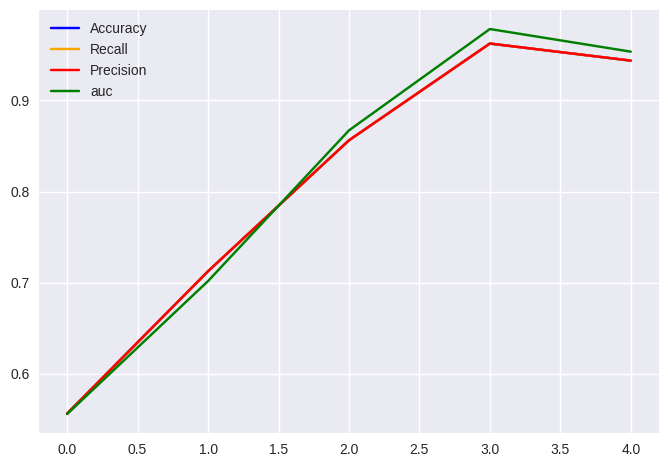

In [ ]:
drawing(
    [history.history['accuracy'], 'Accuracy'],
    [history.history['recall'], 'Recall'],
    [history.history['precision'], 'Precision'],
    [history.history['auc'], 'auc']
)

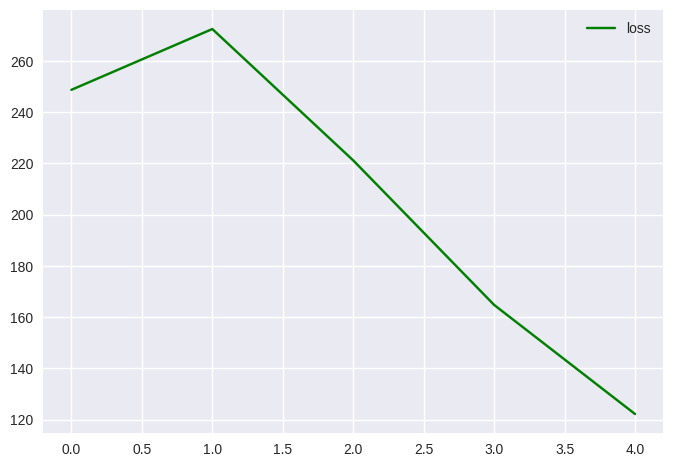

In [ ]:
plt.plot(history.history['loss'],'green', label="loss")
plt.legend()

In [ ]:
mo.evaluate(validation_dataset,batch_size = validation_dataset.batch_size ,steps = validation_dataset.n // validation_dataset.batch_size)

4/4 [==============================] - 29s 7s/step - loss: 188.5963 - tp: 40.0000 - fp: 24.0000 - tn: 40.0000 - fn: 24.0000 - accuracy: 0.6250 - precision: 0.6250 - recall: 0.6250 - auc: 0.6250


[188.59632873535156, 40.0, 24.0, 40.0, 24.0, 0.625, 0.625, 0.625, 0.625]

In [ ]:
metricss = mo.evaluate(validation_dataset,batch_size = validation_dataset.batch_size ,steps = validation_dataset.n // validation_dataset.batch_size)

4/4 [==============================] - 35s 8s/step - loss: 113.9465 - tp: 49.0000 - fp: 15.0000 - tn: 49.0000 - fn: 15.0000 - accuracy: 0.7656 - precision: 0.7656 - recall: 0.7656 - auc: 0.7620


In [ ]:
# Print the metrics
print("Loss: {:.4f}".format(metricss[0]))
print("Accuracy: {:.4f}".format(metricss[5]))
print("Precision: {:.4f}".format(metricss[6]))
print("Recall: {:.4f}".format(metricss[7]))
print("Mean Average Precision: {:.4f}".format(metricss[8]))

Loss: 113.9465
Accuracy: 0.7656
Precision: 0.7656
Recall: 0.7656
Mean Average Precision: 0.7620


In [ ]:
validation_dataset.reset()

In [ ]:
Y_pred = mo.predict(validation_dataset,  workers=1)

23/23 [==============================] - 30s 1s/step


In [ ]:
y_pred = np.argmax(Y_pred ,  axis = 1)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [ ]:
validation_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int32)

In [ ]:
res = tf.math.confusion_matrix(y_pred,validation_dataset.classes).numpy()

In [ ]:
confusion_matrix = pd.DataFrame(res,
                     index = classes_name,
                     columns = classes_name)

<ipython-input-59-a1de039ed492>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn')


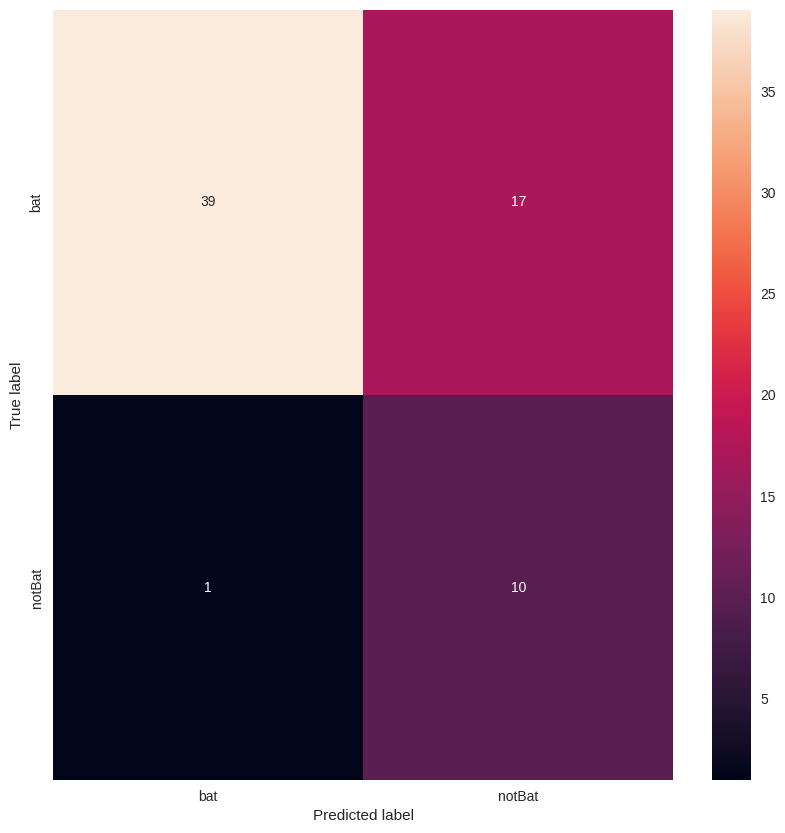

In [ ]:
import seaborn as sns
mpl.style.use('seaborn')
figure = plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
classifi_report = classification_report(validation_dataset.classes, y_pred,target_names = classes_name)
print(classifi_report)

              precision    recall  f1-score   support

         bat       0.70      0.97      0.81        40
      notBat       0.91      0.37      0.53        27

    accuracy                           0.73        67
   macro avg       0.80      0.67      0.67        67
weighted avg       0.78      0.73      0.70        67

